In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/GoudUnclev2.xlsx')

In [3]:
df.head()

,Hydraulic dia inches,Regressed corrected solids %,Regressed density,water %,Regressed OWR,A V m/m,Regressed BHCT,Regressed oil %,Shear Rate,Shear Stress
0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
1,0.96,9.09,70.73,38,0.946,36.6,64.5,59.05,600,100
2,1.2,11.4,70.49,36,0.92,39.24,79.430556,60.95,600,110
3,1.44,13.6,70.26,34,0.961,41.89,94.361111,62.86,600,110
4,1.68,15.9,70.02,32,1.005,44.53,109.29167,64.76,600,109


In [4]:
df.drop(0, inplace=True)
df.head()

,Hydraulic dia inches,Regressed corrected solids %,Regressed density,water %,Regressed OWR,A V m/m,Regressed BHCT,Regressed oil %,Shear Rate,Shear Stress
1,0.96,9.09,70.73,38,0.946,36.6,64.5,59.05,600,100
2,1.2,11.4,70.49,36,0.92,39.24,79.430556,60.95,600,110
3,1.44,13.6,70.26,34,0.961,41.89,94.361111,62.86,600,110
4,1.68,15.9,70.02,32,1.005,44.53,109.29167,64.76,600,109
5,1.92,18.2,69.79,30,1.053,47.17,124.22222,66.67,600,97


## Save the file

In [124]:
# import pickle

# # Save the coefficients and intercept
# model_params = {'coefficients': coefficients, 'intercept': intercept}

# with open('model_params.pkl', 'wb') as f:
#     pickle.dump(model_params, f)


In [125]:
# # Load the coefficients and intercept
# with open('model_params.pkl', 'rb') as f:
#     loaded_model_params = pickle.load(f)

# coefficients_loaded = loaded_model_params['coefficients']
# intercept_loaded = loaded_model_params['intercept']

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [6]:
X = df.drop(['Shear Stress'],axis=1)
y = df['Shear Stress']

## Degree = 3

In [8]:
poly_transformer = PolynomialFeatures(degree=3)
X_poly = poly_transformer.fit_transform(X)

poly_regression = LinearRegression()

kfold = KFold(5, shuffle=True, random_state = 101)
scores = cross_val_score(poly_regression, X_poly, y, cv=kfold, scoring='r2')

print("R^2 scores for each fold:", scores)

mean_r2 = scores.mean()
std_r2 = scores.std()
print("Mean R^2:", mean_r2)
print("Standard Deviation of R^2:", std_r2)


R^2 scores for each fold: [0.97235587 0.97760425 0.98163655 0.9871187  0.99099643]
Mean R^2: 0.9819423591362391
Standard Deviation of R^2: 0.006626977188231231


In [9]:
X_poly.shape

(1520, 220)

In [11]:
import itertools
from sklearn.preprocessing import PolynomialFeatures
variable_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

poly_transformer = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly_transformer.fit_transform(X)

combinations = poly_transformer.powers_
feature_names = []
for combination in combinations:
    names = [f'{variable_names[i]}^{power}' if power > 1 else variable_names[i] for i, power in enumerate(combination) if power > 0]
    feature_names.append('*'.join(names))


print('Feature 0: 1')
for i, feature_name in enumerate(feature_names):
    print(f"Feature {i+1}: {feature_name}")

Feature 0: 1
Feature 1: x1
Feature 2: x2
Feature 3: x3
Feature 4: x4
Feature 5: x5
Feature 6: x6
Feature 7: x7
Feature 8: x8
Feature 9: x9
Feature 10: x1^2
Feature 11: x1*x2
Feature 12: x1*x3
Feature 13: x1*x4
Feature 14: x1*x5
Feature 15: x1*x6
Feature 16: x1*x7
Feature 17: x1*x8
Feature 18: x1*x9
Feature 19: x2^2
Feature 20: x2*x3
Feature 21: x2*x4
Feature 22: x2*x5
Feature 23: x2*x6
Feature 24: x2*x7
Feature 25: x2*x8
Feature 26: x2*x9
Feature 27: x3^2
Feature 28: x3*x4
Feature 29: x3*x5
Feature 30: x3*x6
Feature 31: x3*x7
Feature 32: x3*x8
Feature 33: x3*x9
Feature 34: x4^2
Feature 35: x4*x5
Feature 36: x4*x6
Feature 37: x4*x7
Feature 38: x4*x8
Feature 39: x4*x9
Feature 40: x5^2
Feature 41: x5*x6
Feature 42: x5*x7
Feature 43: x5*x8
Feature 44: x5*x9
Feature 45: x6^2
Feature 46: x6*x7
Feature 47: x6*x8
Feature 48: x6*x9
Feature 49: x7^2
Feature 50: x7*x8
Feature 51: x7*x9
Feature 52: x8^2
Feature 53: x8*x9
Feature 54: x9^2
Feature 55: x1^3
Feature 56: x1^2*x2
Feature 57: x1^2*x3
Fea

In [13]:
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)

lasso = Lasso(alpha=5000, max_iter=4000)
kfold = KFold(n_splits=5, shuffle=True, random_state=101)

pipeline = Pipeline([("poly_transformer", poly_transformer), ("lasso", lasso)] )
cv_scores = cross_validate(pipeline, X, y, scoring='r2', cv=kfold, return_train_score=True, return_estimator=True)

print(sum(np.abs(cv_scores['estimator'][-1]['lasso'].coef_) > 1e-14))
print(cv_scores['test_score'].mean(), cv_scores['test_score'].std())
print(cv_scores['train_score'].mean(), cv_scores['train_score'].std())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+04, tolerance: 3.007e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.656e+04, tolerance: 3.078e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+04, tolerance: 3.175e

33
0.9843443903495604 0.005783940209605397
0.9891895071582516 0.0009595965205750156


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.709e+04, tolerance: 3.229e+02
  model = cd_fast.enet_coordinate_descent(


In [29]:
import numpy as np

In [42]:
np.arange(0.001, 0.1, 0.005)

array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096])

In [43]:
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
train_scores = []
test_scores = []
alpha_values = []
non_zero_coeff = []

for alpha in np.arange(0.01, 0.03, 0.002):
# for alpha in np.arange(0.001, 0.1, 0.005):
  lasso = Lasso(alpha=alpha, max_iter=10000) # lpha = 5000
  kfold = KFold(n_splits=5, shuffle=True, random_state=101)

  pipeline = Pipeline([ ("poly_transformer", poly_transformer), ("scaler", scaler), ("lasso", lasso)] )
  cv_scores = cross_validate(pipeline, X, y, scoring='r2', cv=kfold, return_train_score=True, return_estimator=True)

  alpha_values.append(alpha.round(3))
  print("***********", )
  nnz = sum(np.abs(cv_scores['estimator'][-1]['lasso'].coef_) > 1e-5)
  non_zero_coeff.append(nnz)
  print(alpha.round(3), nnz)

  test_score = cv_scores['test_score'].mean().round(4)
  test_scores.append(test_score)
  print(test_score, cv_scores['test_score'].std().round(4))

  train_score = cv_scores['train_score'].mean().round(4)
  train_scores.append(train_score)
  print(train_score, cv_scores['train_score'].std().round(4))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.426e+03, tolerance: 3.007e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.222e+03, tolerance: 3.078e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.256e+03, tolerance: 3.175e

***********
0.001 84
0.987 0.0053
0.9921 0.0007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.038e+02, tolerance: 3.007e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.420e+02, tolerance: 3.078e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.583e+02, tolerance: 3.175e

***********
0.006 29
0.9829 0.0088
0.9875 0.001
***********
0.011 25
0.9758 0.0107
0.9808 0.0017
***********
0.016 21
0.9726 0.0118
0.9771 0.0014
***********
0.021 16
0.9711 0.0116
0.9751 0.002
***********
0.026 15
0.9702 0.0122
0.9741 0.002
***********
0.031 17
0.9693 0.0126
0.973 0.0019
***********
0.036 16
0.9684 0.0127
0.9719 0.0021
***********
0.041 15
0.9673 0.0127
0.9706 0.0023
***********
0.046 15
0.9665 0.0128
0.9695 0.0023
***********
0.051 15
0.9656 0.0131
0.9685 0.0022
***********
0.056 14
0.9647 0.0133
0.9675 0.0022
***********
0.061 13
0.9637 0.0136
0.9665 0.0022
***********
0.066 14
0.9626 0.0139
0.9654 0.0022
***********
0.071 13
0.9614 0.0141
0.9643 0.0023
***********
0.076 13
0.9605 0.0142
0.9633 0.0025
***********
0.081 12
0.9597 0.0144
0.9625 0.0025
***********
0.086 13
0.9589 0.0146
0.9617 0.0025
***********
0.091 12
0.9579 0.0148
0.9608 0.0026
***********
0.096 12
0.9569 0.015
0.9599 0.0026


In [44]:
np.diff(np.array(test_scores))

array([-0.0041, -0.0071, -0.0032, -0.0015, -0.0009, -0.0009, -0.0009,
       -0.0011, -0.0008, -0.0009, -0.0009, -0.001 , -0.0011, -0.0012,
       -0.0009, -0.0008, -0.0008, -0.001 , -0.001 ])

In [45]:
np.array(train_scores) - np.array(test_scores)

array([0.0051, 0.0046, 0.005 , 0.0045, 0.004 , 0.0039, 0.0037, 0.0035,
       0.0033, 0.003 , 0.0029, 0.0028, 0.0028, 0.0028, 0.0029, 0.0028,
       0.0028, 0.0028, 0.0029, 0.003 ])

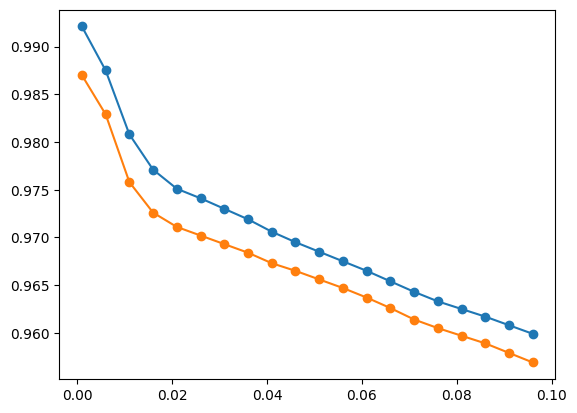

In [46]:
import matplotlib.pyplot as plt
plt.plot(alpha_values, train_scores, '-o')
plt.plot(alpha_values, test_scores, '-o')

In [47]:
coeff = cv_scores['estimator'][-1]['lasso'].coef_
intercept = cv_scores['estimator'][-1]['lasso'].intercept_
non_zero_indices = np.nonzero(coeff)
coeff[non_zero_indices[0]], intercept

(array([ 35.26018982,  15.23762122,   5.70488454,  20.99850574,
         12.22448344, 259.01860196, 102.25087335,  -8.1024492 ,
         -1.89984415, -11.52601342, -72.42885522, -43.11222966]),
 4.796742834683116)

## Final Model

In [105]:
##### random_state=42 gis 15 top features
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)

lasso = Lasso(alpha=0.02, max_iter=10000) # lpha = 5000
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([ ("poly_transformer", poly_transformer), ("scaler", scaler), ("lasso", lasso)] )
cv_scores = cross_validate(pipeline, X, y, scoring='r2', cv=kfold, return_train_score=True, return_estimator=True)

nnz = sum(np.abs(cv_scores['estimator'][-1]['lasso'].coef_) > 1e-5)
print(nnz)

test_score = cv_scores['test_score'].mean().round(4)
print(test_score, cv_scores['test_score'].std().round(4))

train_score = cv_scores['train_score'].mean().round(4)
print(train_score, cv_scores['train_score'].std().round(4))

15
0.9714 0.0101
0.9752 0.002


In [106]:
coeff = cv_scores['estimator'][-1]['lasso'].coef_
intercept = cv_scores['estimator'][-1]['lasso'].intercept_
non_zero_indices = np.nonzero(coeff)
non_zero_indices

(array([  1,  78,  83,  99, 114, 119, 156, 168, 175, 177, 178, 180, 181,
        183, 202]),)

In [107]:
idx = non_zero_indices[0]
feature_names_arr = np.array(feature_names)
feature_names_arr[idx]

array(['x2', 'x1*x4^2', 'x1*x4*x9', 'x2^3', 'x2*x4^2', 'x2*x4*x9',
       'x3*x6*x9', 'x4^2*x9', 'x4*x6*x7', 'x4*x6*x9', 'x4*x7^2',
       'x4*x7*x9', 'x4*x8^2', 'x4*x9^2', 'x6^2*x9'], dtype='<U8')

In [108]:
##### random_state=100 gives 18 top 18 features

poly_transformer = PolynomialFeatures(degree=3, include_bias=False)

lasso = Lasso(alpha=0.02, max_iter=10000) # lpha = 5000
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

pipeline = Pipeline([ ("poly_transformer", poly_transformer), ("scaler", scaler), ("lasso", lasso)] )
cv_scores = cross_validate(pipeline, X, y, scoring='r2', cv=kfold, return_train_score=True, return_estimator=True)

nnz = sum(np.abs(cv_scores['estimator'][-1]['lasso'].coef_) > 1e-5)
print(nnz)

test_score = cv_scores['test_score'].mean().round(4)
print(test_score, cv_scores['test_score'].std().round(4))

train_score = cv_scores['train_score'].mean().round(4)
print(train_score, cv_scores['train_score'].std().round(4))

18
0.9726 0.0038
0.9751 0.0006


In [109]:
coeff = cv_scores['estimator'][-1]['lasso'].coef_
intercept = cv_scores['estimator'][-1]['lasso'].intercept_
non_zero_indices = np.nonzero(coeff)
non_zero_indices

(array([  1,  78,  83,  99, 114, 119, 134, 156, 168, 175, 177, 178, 180,
        181, 183, 198, 201, 202]),)

In [111]:
idx = non_zero_indices[0]
feature_names_arr = np.array(feature_names)
feature_names_arr[idx]

array(['x2', 'x1*x4^2', 'x1*x4*x9', 'x2^3', 'x2*x4^2', 'x2*x4*x9',
       'x2*x9^2', 'x3*x6*x9', 'x4^2*x9', 'x4*x6*x7', 'x4*x6*x9',
       'x4*x7^2', 'x4*x7*x9', 'x4*x8^2', 'x4*x9^2', 'x5*x9^2', 'x6^2*x8',
       'x6^2*x9'], dtype='<U8')

In [112]:
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_transformer.fit_transform(X)
X1 = X_poly[:, idx]

In [113]:
LR = LinearRegression()
pipeline = Pipeline([ ("LR", LR)] )
cv_scores = cross_validate(pipeline, X1, y, scoring='r2', cv=kfold, return_train_score=True, return_estimator=True)

nnz = sum(np.abs(cv_scores['estimator'][-1]['LR'].coef_) > 1e-14)
print(nnz)

test_score = cv_scores['test_score'].mean()
print(test_score, cv_scores['test_score'].std().round(4))

train_score = cv_scores['train_score'].mean()
print(train_score, cv_scores['train_score'].std().round(4))


18
0.9779966382561422 0.0038
0.9811335204421205 0.0006


In [116]:
cv_scores['estimator'][-1]['LR'].coef_

array([ 3.41194684e-02,  2.61903588e-03,  1.55397281e-03, -4.11245387e-04,
        5.78221443e-04,  5.74385123e-04, -1.38952194e-05, -8.62521320e-05,
        2.32142425e-04, -1.94803770e-04, -1.32346138e-04,  2.09421910e-05,
       -5.27769197e-06,  5.87093155e-05, -6.37679003e-06,  2.87779858e-04,
        1.26690854e-04,  4.96685411e-05])

In [122]:
poly_coef = list(cv_scores['estimator'][-1]['LR'].coef_) + [cv_scores['estimator'][-1]['LR'].intercept_]
poly_coef

[0.03411946837539749,
 0.002619035879623782,
 0.0015539728146176197,
 -0.00041124538687731255,
 0.0005782214434204725,
 0.0005743851229267528,
 -1.3895219363230382e-05,
 -8.625213203651101e-05,
 0.00023214242480624664,
 -0.00019480377001610615,
 -0.00013234613750125803,
 2.0942191026881488e-05,
 -5.277691969171671e-06,
 5.870931549378255e-05,
 -6.376790031815334e-06,
 0.0002877798584047416,
 0.00012669085361666145,
 4.966854108462101e-05,
 -12.096213769896607]

In [115]:
cv_scores['estimator'][-1]['LR'].intercept_

-12.096213769896607

In [99]:
=0.03411947*B3  + 0.00261904*A3*(D3^2) +  0.00155397*(A3*D3*I3)  -0.00041125*(B3^3) +  0.00057822*B3*(D3^2) +  0.00057439*B3*D3*I3
 - 1.389521936e-05*B3*(I3^2)  - 8.6252132036e-05*C3*F3*I3 +  0.00023214*(D3^2)*I3  -0.0001948*D3*F3*G3
  -0.00013235*D3*F3*I3 +  2.0942191e-05*D3*(G3^2)  -5.277691969e-06*D3*G3*I3 +  5.87093155e-05*D3*(H3^2)
   -6.37679003e-06*D3*(I3^2) +  0.000287779858*E3*(I3^2) + 0.00012669085361*(F3^2)*H3 +
4.96685411e-05*(F3^2)*I3  -12.096213769